## Examples using RidgeRegression

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from RidgeRegression import RidgeRegression

# Evaluating the model
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error as mse

# Data visualization
import matplotlib.pyplot as plt

### Application with Randomly Generated Dataset

In [2]:
def true_model(X):
    return 5*X + 12

In [3]:
seed = 441

np.random.seed(seed)
sample_size = 100
noise_scale = 1

noise = np.random.normal(scale=noise_scale, size=sample_size)
X = np.random.uniform(0, 1, size=sample_size)
y = true_model(X) + noise

In [4]:
(X.shape, y.shape)

((100,), (100,))

In [5]:
# Split into training and testing data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=seed)

# Fit model
ridge = RidgeRegression()
ridge.fit(Xtrain, ytrain)

# Predict values
y_pred = ridge.predict(Xtest)
print("Mean squared error:", mse(ytest, y_pred))

Mean squared error: 0.5764282222588518


In [6]:
m = float(ridge.W_)
b = float(ridge.b_)
print('y = {}x + {}'.format(m, b))

y = 5.429413936661821x + 11.542339034364584


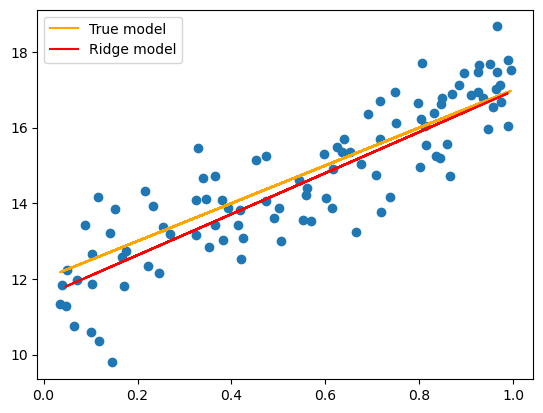

In [7]:
plt.scatter(X, y)
plt.plot(X, true_model(X), color='orange', label='True model')
plt.plot(Xtest, y_pred, color='red', label='Ridge model')
plt.legend()
plt.show()

### Application with Cars Dataset

Get dataset here: https://gist.github.com/noamross/e5d3e859aa0c794be10b

In [8]:
cars = pd.read_csv('cars.csv')

X = cars.loc[:,'CYL':'WGT'].values
y = cars['MPG'].values

In [9]:
(X.shape, y.shape)

((392, 3), (392,))

In [10]:
# Split into training and testing data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True)

# Scale data
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# Fit model
ridge = RidgeRegression()
ridge.fit(Xtrain_scaled, ytrain)

# Predict values
y_pred = ridge.predict(Xtest_scaled)
print("Mean squared error:", mse(ytest, y_pred))

Mean squared error: 21.606458438422194


In [11]:
# Store mean squared errors for each k-fold
train_mse = []
test_mse = []

kf = KFold(shuffle=True)
for idxTrain, idxTest in kf.split(X):
    Xtrain = X[idxTrain]
    ytrain = y[idxTrain]
    Xtest = X[idxTest]
    ytest = y[idxTest]

    scaler = StandardScaler()
    Xtrain_scaled = scaler.fit_transform(Xtrain)
    Xtest_scaled = scaler.transform(Xtest)

    ridge = RidgeRegression()
    ridge.fit(Xtrain_scaled, ytrain)
    
    train_mse.append(mse(ytrain, ridge.predict(Xtrain_scaled)))
    test_mse.append(mse(ytest, ridge.predict(Xtest_scaled)))

print("Average training mean squared error:", np.mean(train_mse))
print("Average testing mean squared error:", np.mean(test_mse))

Average training mean squared error: 18.24920127647404
Average testing mean squared error: 18.660411088309374
